# Lack of Robustness of the Markowitz Procedure, and the GMV

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [4]:
# These values are estimates, however, this example we use a historical data which is accurate
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [6]:
import numpy as np
erk.msr(0.1,np.array([.11,.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

In [7]:
# A small change in the expected returns will return a very different portfolio ratio

In [8]:
erk.msr(0.1,np.array([.10,.13]),cov.loc[l,l])

array([0., 1.])

In [9]:
erk.msr(0.1,np.array([.13,.10]),cov.loc[l,l])

array([1., 0.])

In [10]:
# a little miscalcualtion can lead to extreme portfolio ratios. Error maximisation in markowitz analysis


<AxesSubplot:xlabel='Volatility'>

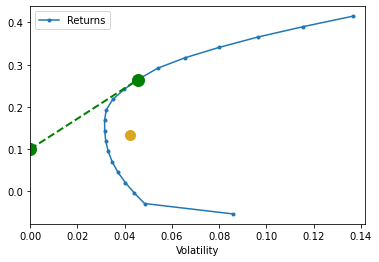

In [15]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<AxesSubplot:xlabel='Volatility'>

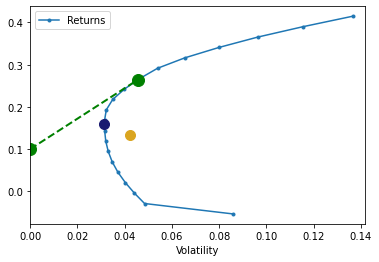

In [17]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_gmv=True, show_ew=True)

# Estimating the covariance is much easier than estimating the expected returns
- That is why the GMV is used rather than the MSR